# Metadata exploration

In [2]:
! ls

'Dev EM 15 03 1626.ipynb'     prepare_dir.ipynb
'Dev EM 17 03 1300.ipynb'     preprocessing_data.ipynb
 metadata_exploration.ipynb


In [115]:
path = '../Data/rare_species 1'
import pandas as pd
df = pd.read_csv(path + '/metadata.csv')
df.head()

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11983 entries, 0 to 11982
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rare_species_id  11983 non-null  object
 1   eol_content_id   11983 non-null  int64 
 2   eol_page_id      11983 non-null  int64 
 3   kingdom          11983 non-null  object
 4   phylum           11983 non-null  object
 5   family           11983 non-null  object
 6   file_path        11983 non-null  object
dtypes: int64(2), object(5)
memory usage: 655.4+ KB


In [117]:
for col in df.columns[3:-1]:
    print('*'*50)
    print(col)
    print(f"{df[col].value_counts(normalize=True)}")
    print(f'max: {df[col].value_counts(normalize=True).max()}')
    print(f'min: {df[col].value_counts(normalize=True).min()}')
    print('*'*50)


**************************************************
kingdom
kingdom
animalia    1.0
Name: proportion, dtype: float64
max: 1.0
min: 1.0
**************************************************
**************************************************
phylum
phylum
chordata         0.830510
arthropoda       0.079362
cnidaria         0.067596
mollusca         0.017525
echinodermata    0.005007
Name: proportion, dtype: float64
max: 0.83050988900943
min: 0.00500709338229158
**************************************************
**************************************************
family
family
cercopithecidae      0.025035
dactyloidae          0.025035
formicidae           0.024284
plethodontidae       0.022532
carcharhinidae       0.022532
                       ...   
megapodiidae         0.002504
tropiduridae         0.002504
parulidae            0.002504
brachypteraciidae    0.002504
siluridae            0.002420
Name: proportion, Length: 202, dtype: float64
max: 0.025035466911457898
min: 0.002420095134774

the dataset contains 7 columns:

- 'rare_species_id': the id and it's cardinality is the length of the dataset
- 'eol_content_id': reference to the species in the Encyclopedia of Life (EOL) -----> maybe good for image quality inference (?)
- 'eol_page_id': reference to the species in the Encyclopedia of Life (EOL) -----> maybe good for image quality inference (?)
- kingdom: the kingdom of the species -----> useless the kingdom is the same for all the species (animalia)
- phylum: the phylum of the species -----> HUGE fucking class imbalance (chordata: 83%, arthropoda: 8%, cnidaria: 7%, others: 2%)
- family: the family of the species -----> it's the target variable
- file_path: the path to the image of the species

# Image exploration

## check that all the images are the same size


In [118]:
from PIL import Image
import numpy as np

sizes = []
path = '../Data/rare_species 1'

for img_path in df['file_path']:
    imagepath = path + '/' + img_path
    img = Image.open(imagepath)
    sizes.append(img.size)
    img.close()
    

sizes = np.array(sizes)
# distribution of image sizes
print(f"Max: {sizes.max(axis=0)}")
print(f"Min: {sizes.min(axis=0)}")
print(f"Mean: {sizes.mean(axis=0)}")
print(f"Std: {sizes.std(axis=0)}")

/opt/anaconda3/envs/DL_env/lib/python3.12/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (115600000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Max: [17000  8688]
Min: [170 125]
Mean: [1924.60093466 1512.2602854 ]
Std: [1267.52242368  951.29047938]


In [152]:
imagepath = path + '/' + df['file_path'][100]

imagepath

# open the image at imagepath
from PIL import Image
img = Image.open(imagepath)
img.show() 

In [120]:
# preprocessing the image for the model using keras
from keras.preprocessing import image 
from keras.applications.vgg16 import preprocess_input
import numpy as np

img = image.load_img(imagepath, target_size=(224, 224))
print(f"Image Type: {type(img)}")
print(f"Image shape: {img.size}")
print("-"*50)

# convert image to numpy array

img_array = image.img_to_array(img)
print(f"Image Type: {type(img_array)}")
print(f"Image shape: {img_array.shape}")
print(f"Image max: {img_array.max()}")
print(f"Image min: {img_array.min()}")
print(f"Image mean: {img_array.mean()}")
print(f"Image std: {img_array.std()}")
print("-"*50)

# expand the dimensions of the image for later aggregation

img_array = np.expand_dims(img_array, axis=0)
print(f"Image Type: {type(img_array)}")
print(f"Image shape: {img_array.shape}")
print(f"Image max: {img_array.max()}")
print(f"Image min: {img_array.min()}")
print(f"Image mean: {img_array.mean()}")
print(f"Image std: {img_array.std()}")
print("-"*50)

# center the image around zero

img_array = preprocess_input(img_array)
print(f"Image Type: {type(img_array)}")
print(f"Image shape: {img_array.shape}")
print(f"Image max: {img_array.max()}")
print(f"Image min: {img_array.min()}")
print(f"Image mean: {img_array.mean()}")
print(f"Image std: {img_array.std()}")
print("-"*50)

Image Type: <class 'PIL.Image.Image'>
Image shape: (224, 224)
--------------------------------------------------
Image Type: <class 'numpy.ndarray'>
Image shape: (224, 224, 3)
Image max: 255.0
Image min: 0.0
Image mean: 101.19913482666016
Image std: 37.6596565246582
--------------------------------------------------
Image Type: <class 'numpy.ndarray'>
Image shape: (1, 224, 224, 3)
Image max: 255.0
Image min: 0.0
Image mean: 101.19913482666016
Image std: 37.6596565246582
--------------------------------------------------
Image Type: <class 'numpy.ndarray'>
Image shape: (1, 224, 224, 3)
Image max: 151.06100463867188
Image min: -123.68000030517578
Image mean: -13.600198745727539
Image std: 36.666568756103516
--------------------------------------------------


# create the target



## create the outoput space
- an n dimensional space where n is the number of species
- an m dimensional spache where m is the number of families

In [121]:
print (df['phylum'].value_counts())

phylum = df['phylum'].unique()
n_classes_phylum = len(phylum)

print (df['family'].value_counts())

family = df['family'].unique()
n_classes_species = len(family)




phylum
chordata         9952
arthropoda        951
cnidaria          810
mollusca          210
echinodermata      60
Name: count, dtype: int64
family
cercopithecidae      300
dactyloidae          300
formicidae           291
plethodontidae       270
carcharhinidae       270
                    ... 
megapodiidae          30
tropiduridae          30
parulidae             30
brachypteraciidae     30
siluridae             29
Name: count, Length: 202, dtype: int64


In [122]:
print (n_classes_species)
print (n_classes_phylum)

202
5


In [123]:
from keras.utils import to_categorical

phylum_dict = {phylum[i]:i for i in range(n_classes_phylum)}
family_dict = {family[i]:i for i in range(n_classes_species)}

y_phylum = df['phylum'].map(phylum_dict)
y_family = df['family'].map(family_dict)

y_phylum = to_categorical(y_phylum, num_classes=n_classes_phylum)
y_family = to_categorical(y_family, num_classes=n_classes_species)

In [124]:
dict_data = {}
for index,id in enumerate(df['rare_species_id']):
    dict_data[index] = {'phylum':y_phylum[index], 'family':y_family[index], 'file_path':df['file_path'][index]}
    
df_dict = pd.DataFrame.from_dict(dict_data, orient='index')
df_dict.rename(columns={'index':'new_id'}, inplace=True)
df_dict.head()

df_dict['is_cordata'] = df_dict['phylum'].apply(lambda x: 1 if x[0] == 1 else 0)
df_dict.head()
    


,phylum,family,file_path,is_cordata
0,"[1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mollusca_unionidae/12853737_449393_eol-full-si...,1
1,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",chordata_geoemydidae/20969394_793083_eol-full-...,0
2,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",chordata_cryptobranchidae/28895411_319982_eol-...,0
3,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",chordata_turdidae/29658536_45510188_eol-full-s...,0
4,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",chordata_indriidae/21252576_7250886_eol-full-s...,0


# Preprocessing

In [125]:
import tensorflow as tf

def preprocess_image_tf(image_path, target_size=(224, 224)):
    """
    Preprocesses an image for use in TensorFlow pipelines.

    Args:
        image_path (tf.Tensor): Path to the image file as a Tensor.
        target_size (tuple): Desired dimensions (height, width) for resizing.

    Returns:
        tf.Tensor: Resized and normalized image tensor.
    """
    img_raw = tf.io.read_file(image_path)
    
    img = tf.image.decode_jpeg(img_raw, channels=3)
    
    img_resized = tf.image.resize(img, target_size)
    
    img_resized = img_resized / 255.0
    
    return img_resized



# Example file paths as TensorFlow dataset
file_paths = df['file_path'].tolist()
input_path = '../Data/rare_species 1'
full_paths = [f"{input_path}/{img}" for img in file_paths]
dataset = tf.data.Dataset.from_tensor_slices(full_paths)

# Apply preprocessing dynamically
dataset = dataset.map(lambda x: preprocess_image_tf(x, target_size=(224, 224)))

# Batch and prefetch for efficient training
dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)

print("Dataset pipeline ready!")


Dataset pipeline ready!


In [129]:
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocesses an image by resizing it to the target size.

    Args:
        image_path (str): Path to the image file.
        target_size (tuple): Desired dimensions (height, width) for resizing.

    Returns:
        tf.Tensor: Resized image tensor.
    """
    img = tf.keras.preprocessing.image.load_img(image_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    resized_img = tf.image.resize(img_array, target_size)
    resized_img = resized_img / 255.0
    # in this part we will add some better preprocessing steps (open for suggestions)
    return resized_img

# Test the function with an image
preprocessed_img = preprocess_image(imagepath)
print(f"Image shape: {preprocessed_img.shape}")
print(f"Image dtype: {preprocessed_img.dtype}")




Image shape: (224, 224, 3)
Image dtype: <dtype: 'float32'>


In [130]:
for i in range(10):
    img = Image.open(path + '/' +
                     df['file_path'][i])
    preprocessed_img = preprocess_image(path + '/' +
                                        df['file_path'][i])
    print(f"Original image shape: {img.size}")
    print(f"Preprocessed image shape: {preprocessed_img.shape}")
    print("-"*50)
    img.close()


Original image shape: (400, 400)
Preprocessed image shape: (224, 224, 3)
--------------------------------------------------
Original image shape: (1596, 1066)
Preprocessed image shape: (224, 224, 3)
--------------------------------------------------
Original image shape: (2480, 1396)
Preprocessed image shape: (224, 224, 3)
--------------------------------------------------
Original image shape: (1554, 2019)
Preprocessed image shape: (224, 224, 3)
--------------------------------------------------
Original image shape: (1365, 2048)
Preprocessed image shape: (224, 224, 3)
--------------------------------------------------
Original image shape: (1000, 795)
Preprocessed image shape: (224, 224, 3)
--------------------------------------------------
Original image shape: (2592, 3456)
Preprocessed image shape: (224, 224, 3)
--------------------------------------------------
Original image shape: (2048, 1536)
Preprocessed image shape: (224, 224, 3)
----------------------------------------------

In [132]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dict['file_path'], df_dict['is_cordata'], test_size=0.2, random_state=42, stratify=df_dict['is_cordata'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9586,), (2397,), (9586,), (2397,))

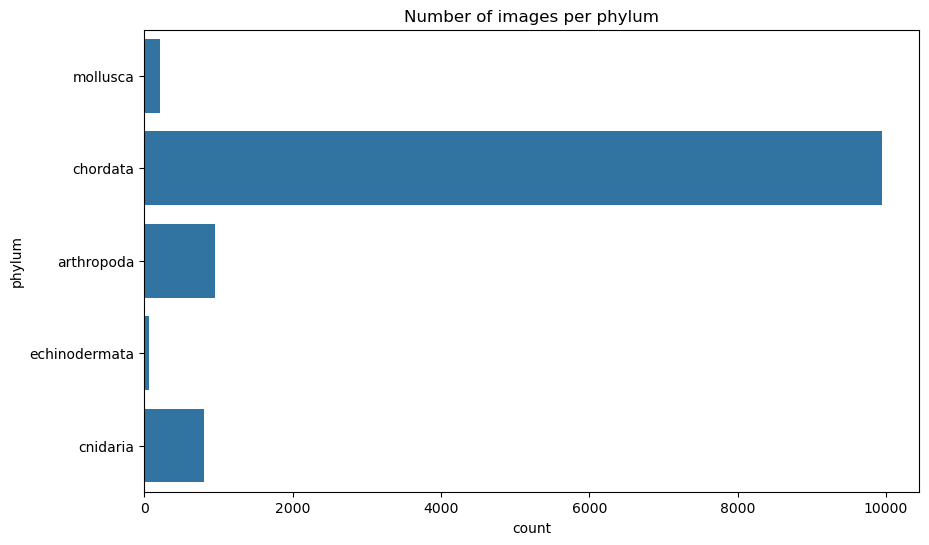

In [133]:
len(df['eol_page_id'].unique()) 
# bar plot of the number of images per species
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='phylum', data=df)
plt.title("Number of images per phylum")
plt.show()


# first model
- use the image as input
- predic is_cordata



In [134]:
# import keras vv16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

# load the model
base_model = VGG16(include_top=False, input_shape=(224, 224, 3))

# show me the structure of the model
base_model.summary()





Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [139]:
# change the model to become a binary classifier
flat1 = Flatten()(base_model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(class1) 

# define the model
first_model = Model(inputs=base_model.inputs, outputs=output)

# show me the structure of the model
first_model.name = 'VGG16_LDica_v1_03_12_is_cordata'
first_model.summary() 



Model: "VGG16_LDica_v1_03_12_is_cordata"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,406,849 (154.14 MB)

 Trainable params: 40,406,849 (154.14 MB)

 Non-trainable params: 0 (0.00 B)

# is_chordata
- create a model that predicts if the species is a chordata or not

In [136]:
X_train.head()

1888     arthropoda_formicidae/14690157_460289_eol-full...
8229     chordata_vespertilionidae/21686378_327547_eol-...
2101     chordata_geoemydidae/21922210_793088_eol-full-...
9479     chordata_dactyloidae/28475825_1057157_eol-full...
11213    mollusca_zonitidae/20925372_4890709_eol-full-s...
Name: file_path, dtype: object

In [ ]:
# by calling Sequential:
input_shape = (224, 224, 3)

model = Sequential(
    layers = [
        Input(shape=input_shape),
        Conv2D(filters=3 * 8, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=3 * 16, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        # input size is infered
        Dense(n_classes, activation="softmax"),
    ],
    name = "my_tiny_sequential_cnn"
)

model.summary()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def get_my_tiny_functional_cnn() -> Model:
    """
    Constructs "my_tiny_functional_cnn"
    """

    conv_layer_1 = Conv2D(
        filters=3 * 8,
        kernel_size=(3, 3),
        activation="relu",
        name="conv_layer_1"
    )
    max_pool_layer_1 = MaxPooling2D(pool_size=(2, 2), name="max_pool_layer_1")

    conv_layer_2 = Conv2D(
        filters=3 * 16,
        kernel_size=(3, 3),
        name="conv_layer_2"
    )
    act_layer_2 = LeakyReLU(negative_slope=0.3, name="act_layer_2")
    max_pool_layer_2 = MaxPooling2D(pool_size=(2, 2), name="max_pool_layer_2")

    flatten_layer = Flatten(name="flatten_layer")
    dense_layer = Dense(
        n_classes,
        activation="softmax",
        name="classification_head"
    )


    inputs = Input(shape=input_shape)
    x = inputs

    x = conv_layer_1(x)
    x = max_pool_layer_1(x)

    x = conv_layer_2(x)
    x = act_layer_2(x)
    x = max_pool_layer_2(x)

    x = flatten_layer(x)
    x = dense_layer(x)

    outputs = x

    return Model(inputs=inputs, outputs=outputs, name="my_tiny_functional_cnn")